In [1]:
from pathlib import Path
import os

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
root_path = Path(os.getcwd())
data_path = root_path / '.dataset'
test_dir_name = 'Testing'
train_dir_name = 'Training'
train_dir = data_path / train_dir_name
test_dir = data_path / test_dir_name            

In [5]:
label_encoder = LabelEncoder()

In [6]:
labels = [path.stem for path in train_dir.iterdir() if path.is_dir()]

In [7]:
def count_classes_in_dir(directory, category_dictionary=None):
    if category_dictionary is None:
        category_dictionary = {}
    for path in directory.iterdir():
        if path.is_dir():
            category_dictionary[path.stem] = category_dictionary.get(path.stem, 0) + len(list(path.glob('*.jpg')))
        else:
            print(f"Skipping non-directory file: {path}")
    return category_dictionary

In [8]:
training_categories = count_classes_in_dir(train_dir)

In [9]:
training_categories

{'glioma_tumor': 826,
 'meningioma_tumor': 822,
 'no_tumor': 395,
 'pituitary_tumor': 827}

In [10]:
test_categories = count_classes_in_dir(test_dir)

In [11]:
dataset_categories = {label: 0 for label in labels}
for directory in [train_dir, test_dir]:
    count_classes_in_dir(directory, dataset_categories)

In [12]:
dataset_categories

{'glioma_tumor': 926,
 'meningioma_tumor': 937,
 'no_tumor': 500,
 'pituitary_tumor': 901}

In [13]:
list(dataset_categories.keys())

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [14]:
train_categories_df = pd.DataFrame.from_dict(training_categories, orient='index', columns=['count'])
test_categories_df = pd.DataFrame.from_dict(test_categories, orient='index', columns=['count'])
dataset_categories_df = pd.DataFrame.from_dict(dataset_categories, orient='index', columns=['count'])

In [18]:
train_categories_df_normalized = train_categories_df / train_categories_df['count'].sum()
test_categories_df_normalized = test_categories_df / test_categories_df['count'].sum()
dataset_categories_df_normalized = dataset_categories_df / dataset_categories_df['count'].sum()

[Text(0, 0, 'glioma_tumor'),
 Text(1, 0, 'meningioma_tumor'),
 Text(2, 0, 'no_tumor'),
 Text(3, 0, 'pituitary_tumor')]

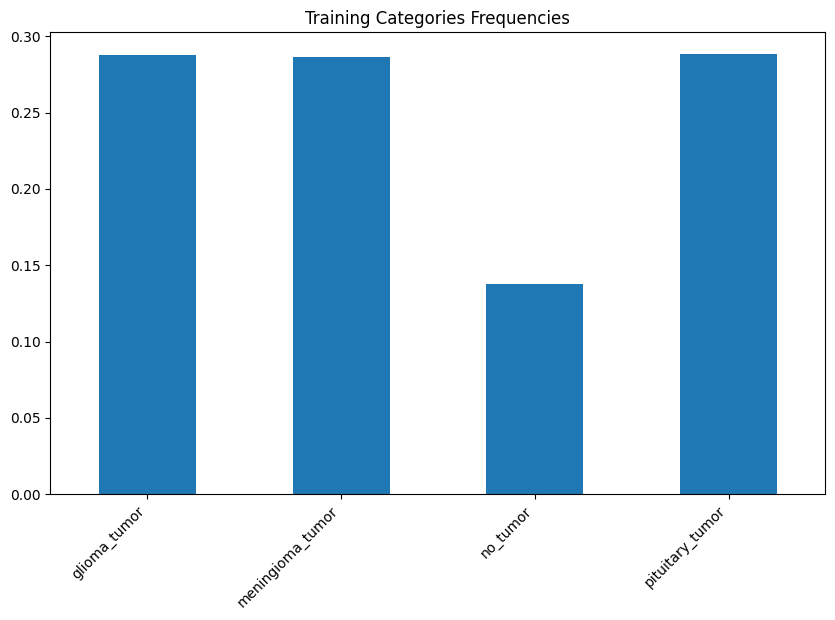

In [21]:
ax = train_categories_df_normalized.plot(kind='bar', figsize=(10, 6), legend=False, title='Training Categories Frequencies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

[Text(0, 0, 'glioma_tumor'),
 Text(1, 0, 'meningioma_tumor'),
 Text(2, 0, 'no_tumor'),
 Text(3, 0, 'pituitary_tumor')]

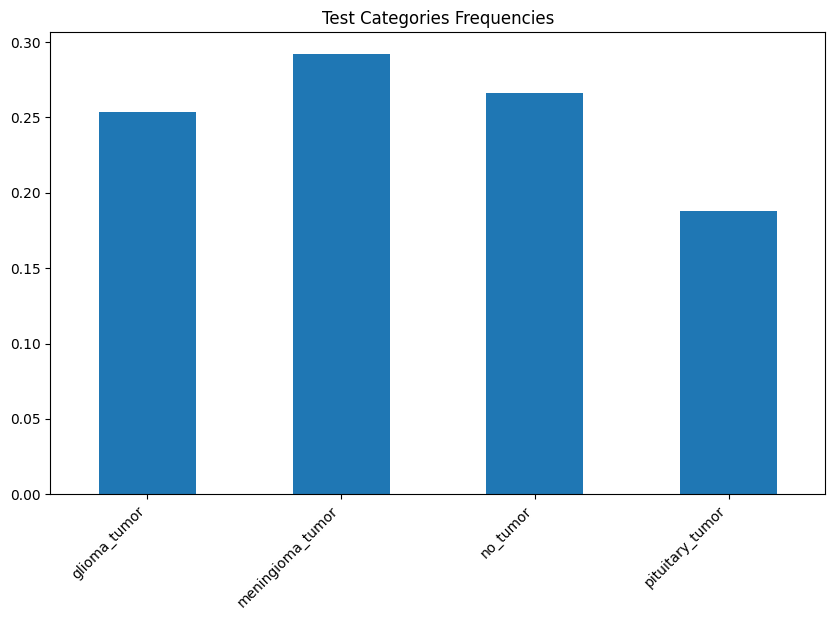

In [22]:
ax = test_categories_df_normalized.plot(kind='bar', figsize=(10, 6), legend=False, title='Test Categories Frequencies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

[Text(0, 0, 'glioma_tumor'),
 Text(1, 0, 'meningioma_tumor'),
 Text(2, 0, 'no_tumor'),
 Text(3, 0, 'pituitary_tumor')]

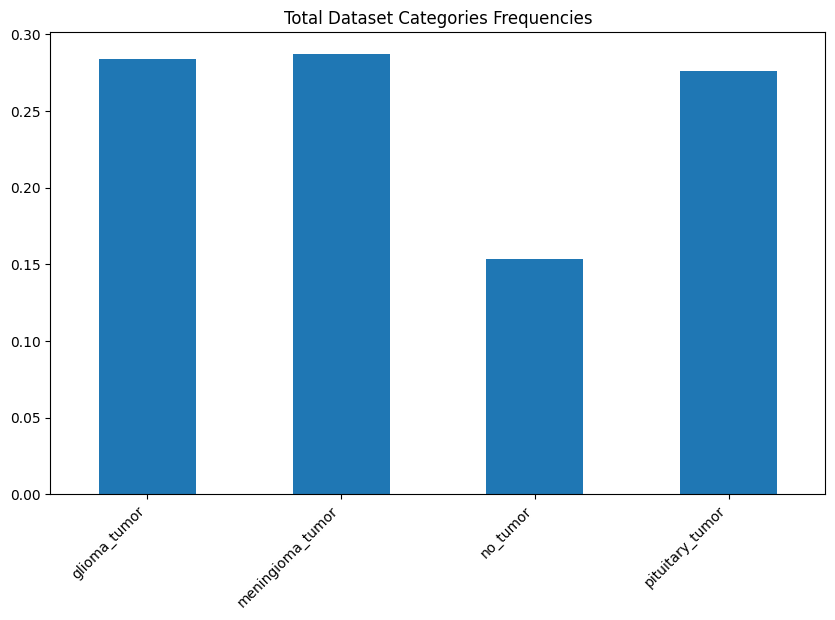

In [23]:
ax = dataset_categories_df_normalized.plot(kind='bar', figsize=(10, 6), legend=False, title='Total Dataset Categories Frequencies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')